## Dataset Import

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import statsmodels
import sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error,f1_score,precision_score,recall_score,roc_auc_score,average_precision_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_val_predict,StratifiedKFold,RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeRegressor

In [2]:
train = pd.read_csv('C:/Users/User/Desktop/Kaggle - Spaceship Titanic/train.csv')
test = pd.read_csv('C:/Users/User/Desktop/Kaggle - Spaceship Titanic/test.csv')

## Feature Engineering

### Introducing the Data

In [3]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
train['PassengerId'].unique().shape

(8693,)

In [5]:
train['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [6]:
train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [7]:
train['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

### Name - PassengerId

In [8]:
train.loc[train['Name'].isna(),'Name'] = 'nan nan'

name = train['Name'].str.split(" ")

surname = [tuple[0] for tuple in name]
name = [tuple[1] for tuple in name]

train['Name'] = name
train['Surname'] = surname

In [9]:
test.loc[test['Name'].isna(),'Name'] = 'nan nan'

name = test['Name'].str.split(" ")

surname = [tuple[0] for tuple in name]
name = [tuple[1] for tuple in name]

test['Name'] = name
test['Surname'] = surname

In [10]:
train.loc[train['PassengerId'].isna(),'PassengerId'] = 'nan_nan'

pasid = train['PassengerId'].str.split("_")

gggg = [tuple[0] for tuple in pasid]
pp = [tuple[1] for tuple in pasid]

train['GroupNumber'] = gggg
train['PeopleNumber'] = pp

In [11]:
test.loc[test['PassengerId'].isna(),'PassengerId'] = 'nan_nan'

pasid = test['PassengerId'].str.split("_")

gggg = [tuple[0] for tuple in pasid]
pp = [tuple[1] for tuple in pasid]

test['GroupNumber'] = gggg
test['PeopleNumber'] = pp

### Cabin

In [12]:
train[train['Destination']== 'PSO J318.5-22']['Cabin'].value_counts()

G/109/P     3
F/1194/P    3
E/385/P     2
G/1300/S    2
G/872/P     2
           ..
F/585/S     1
G/488/S     1
G/491/S     1
G/513/P     1
G/1499/S    1
Name: Cabin, Length: 754, dtype: int64

In [13]:
train['Cabin'] = train['Cabin'].fillna('N/A/N')

for group in train[train['Cabin'] == 'N/A/N']['GroupNumber']:
    for cabin in train[(train['Cabin'] != 'N/A/N') & (train['GroupNumber'] == group)]['Cabin']:
        if cabin is not None:
            train.loc[(train['Cabin'] == 'N/A/N') & (train['GroupNumber'] == group),'Cabin'] = cabin

In [14]:
test['Cabin'] = test['Cabin'].fillna('N/A/N')

for group in test[test['Cabin'] == 'N/A/N']['GroupNumber']:
    for cabin in test[(test['Cabin'] != 'N/A/N') & (test['GroupNumber'] == group)]['Cabin']:
        if cabin is not None:
            test.loc[(test['Cabin'] == 'N/A/N') & (test['GroupNumber'] == group),'Cabin'] = cabin

In [15]:
cabin = train['Cabin']
cabin = cabin.str.split("/")

x = [tuple[0] for tuple in cabin]
y = [tuple[1] for tuple in cabin]
z = [tuple[2] for tuple in cabin]

train['Cabin_0'] = x
train['Cabin_1'] = y
train['Cabin_2'] = z

In [16]:
cabin = test['Cabin']
cabin = cabin.str.split("/")

x = [tuple[0] for tuple in cabin]
y = [tuple[1] for tuple in cabin]
z = [tuple[2] for tuple in cabin]

test['Cabin_0'] = x
test['Cabin_1'] = y
test['Cabin_2'] = z

In [17]:
train['Cabin_0'].value_counts()

F    2811
G    2587
E     885
B     796
C     761
D     487
A     262
N      99
T       5
Name: Cabin_0, dtype: int64

In [18]:
train['Cabin_2'].value_counts()

S    4343
P    4251
N      99
Name: Cabin_2, dtype: int64

In [19]:
train.loc[train['HomePlanet'].isna(),'HomePlanet'] = 'nan'
train.loc[train['VIP'].isna(),'VIP'] = 'nan'
train.loc[train['CryoSleep'].isna(),'CryoSleep'] = 'nan'
train.loc[train['Destination'].isna(),'Destination'] = 'nan'

In [20]:
test.loc[test['HomePlanet'].isna(),'HomePlanet'] = 'nan'
test.loc[test['VIP'].isna(),'VIP'] = 'nan'
test.loc[test['CryoSleep'].isna(),'CryoSleep'] = 'nan'
test.loc[test['Destination'].isna(),'Destination'] = 'nan'

In [21]:
# Dealing With Cabin Missing Values

for planet in train['HomePlanet'].unique():
    for vip in train['VIP'].unique():
        for cryo in train['CryoSleep'].unique():
            for dest in train['Destination'].unique():
                diff = 1
                for cabin0 in train[train['Cabin_0']!='N']['Cabin_0'].unique():
                    mean_cabin0_N = train[(train['HomePlanet']== planet) & (train['VIP']== vip) &
                                        (train['CryoSleep']== cryo) & (train['Destination']== dest) & (train['Cabin_0']== 'N')]['Transported'].mean()
                    mean_cabin0 = train[(train['HomePlanet']== planet) & (train['VIP']== vip) &
                                        (train['CryoSleep']== cryo) & (train['Destination']== dest) & (train['Cabin_0']== cabin0)]['Transported'].mean()
                    if abs(mean_cabin0_N-mean_cabin0) < diff:
                        diff = abs(mean_cabin0_N-mean_cabin0)
                        assign_N_to = cabin0
                train.loc[(train['HomePlanet']== planet) & (train['VIP']== vip) &
                        (train['CryoSleep']== cryo) & (train['Destination']== dest) & (train['Cabin_0']== 'N'),'Cabin_0'] = assign_N_to
                test.loc[(test['HomePlanet']== planet) & (test['VIP']== vip) &
                        (test['CryoSleep']== cryo) & (test['Destination']== dest) & (test['Cabin_0']== 'N'),'Cabin_0'] = assign_N_to
                

for planet in train['HomePlanet'].unique():
    for vip in train['VIP'].unique():
        for cryo in train['CryoSleep'].unique():
            for dest in train['Destination'].unique():
                diff = 1
                for cabin2 in train[train['Cabin_2']!='N']['Cabin_2'].unique():
                    mean_cabin2_N = train[(train['HomePlanet']== planet) & (train['VIP']== vip) &
                                        (train['CryoSleep']== cryo) & (train['Destination']== dest) & (train['Cabin_2']== 'N')]['Transported'].mean()
                    mean_cabin2 = train[(train['HomePlanet']== planet) & (train['VIP']== vip) &
                                        (train['CryoSleep']== cryo) & (train['Destination']== dest) & (train['Cabin_2']== cabin2)]['Transported'].mean()
                    if abs(mean_cabin2_N-mean_cabin2) < diff:
                        diff = abs(mean_cabin2_N-mean_cabin2)
                        assign_N_to = cabin2
                train.loc[(train['HomePlanet']== planet) & (train['VIP']== vip) &
                        (train['CryoSleep']== cryo) & (train['Destination']== dest) & (train['Cabin_2']== 'N'),'Cabin_2'] = assign_N_to
                test.loc[(test['HomePlanet']== planet) & (test['VIP']== vip) &
                        (test['CryoSleep']== cryo) & (test['Destination']== dest) & (test['Cabin_2']== 'N'),'Cabin_2'] = assign_N_to

In [22]:
from random import sample

for cabin0 in train['Cabin_0'].unique():
    for cabin2 in train['Cabin_2'].unique():
        random_num = list(range(1,100))
        for cabin1 in train[(train['Cabin_0'] == cabin0) & (train['Cabin_2'] == cabin2)]['Cabin_1']:
            if cabin1 != 'A':
                for i in random_num:
                    if str(i) == cabin1:
                        random_num.remove(i)
            else:
                train.loc[(train['Cabin_0'] == cabin0) & (train['Cabin_2'] == cabin2) & (train['Cabin_1'] == 'A'),'Cabin_1'] = str(sample(random_num,1)[0])

In [23]:
for cabin0 in test['Cabin_0'].unique():
    for cabin2 in test['Cabin_2'].unique():
        random_num = list(range(1,100))
        for cabin1 in test[(test['Cabin_0'] == cabin0) & (test['Cabin_2'] == cabin2)]['Cabin_1']:
            if cabin1 != 'A':
                for i in random_num:
                    if str(i) == cabin1:
                        random_num.remove(i)
            else:
                test.loc[(test['Cabin_0'] == cabin0) & (test['Cabin_2'] == cabin2) & (test['Cabin_1'] == 'A'),'Cabin_1'] = str(sample(random_num,1)[0])

### Destination

In [24]:
train['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', 'nan'], dtype=object)

In [25]:
for planet in train['HomePlanet'].unique():
    for vip in train['VIP'].unique():
        for cryo in train['CryoSleep'].unique():
            diff = 1
            for dest in train[train['Destination'] != 'nan']['Destination'].unique():
                mean_dest_N = train[(train['HomePlanet']== planet) & (train['VIP']== vip) &
                                    (train['CryoSleep']== cryo) & (train['Destination']== 'nan')]['Transported'].mean()
                mean_dest = train[(train['HomePlanet']== planet) & (train['VIP']== vip) &
                                    (train['CryoSleep']== cryo) &  (train['Destination']== dest)]['Transported'].mean()
                if abs(mean_dest_N-mean_dest) < diff:
                    diff = abs(mean_dest_N-mean_dest)
                    assign_N_to = dest
            train.loc[(train['HomePlanet']== planet) & (train['VIP']== vip) &
                        (train['CryoSleep']== cryo) & (train['Destination']== 'nan'),'Destination'] = assign_N_to
            test.loc[(test['HomePlanet']== planet) & (test['VIP']== vip) &
                        (test['CryoSleep']== cryo) & (test['Destination']== 'nan'),'Destination'] = assign_N_to

In [26]:
train['Destination'].value_counts()

TRAPPIST-1e      5956
55 Cancri e      1841
PSO J318.5-22     896
Name: Destination, dtype: int64

### HomePlanet

In [27]:
train['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', 'nan'], dtype=object)

In [28]:
for dest in train['Destination'].unique():
    for vip in train['VIP'].unique():
        for cryo in train['CryoSleep'].unique():
            diff = 1
            for planet in train[train['HomePlanet'] != 'nan']['HomePlanet'].unique():
                mean_planet_N = train[(train['Destination']== dest) & (train['VIP']== vip) &
                                    (train['CryoSleep']== cryo) & (train['HomePlanet']== 'nan')]['Transported'].mean()
                mean_planet = train[(train['Destination']== dest) & (train['VIP']== vip) &
                                    (train['CryoSleep']== cryo) & (train['HomePlanet']== planet)]['Transported'].mean()
                if abs(mean_planet_N-mean_planet) < diff:
                    diff = abs(mean_planet_N-mean_planet)
                    assign_N_to = planet
            train.loc[(train['Destination']== dest) & (train['VIP']== vip) &
                        (train['CryoSleep']== cryo) & (train['HomePlanet']== 'nan'),'HomePlanet'] = assign_N_to
            test.loc[(test['Destination']== dest) & (test['VIP']== vip) &
                        (test['CryoSleep']== cryo) & (test['HomePlanet']== 'nan'),'HomePlanet'] = assign_N_to

In [29]:
train['HomePlanet'].value_counts()

Earth     4628
Europa    2134
Mars      1931
Name: HomePlanet, dtype: int64

### VIP

In [30]:
train['VIP'].unique()

array([False, True, 'nan'], dtype=object)

In [31]:
for dest in train['Destination'].unique():
    for planet in train['HomePlanet'].unique():
        for cryo in train['CryoSleep'].unique():
            diff = 1
            for vip in train[train['VIP'] != 'nan']['VIP'].unique():
                mean_vip_N = train[(train['Destination']== dest) & (train['HomePlanet']== planet) &
                                    (train['CryoSleep']== cryo) & (train['VIP']== 'nan')]['Transported'].mean()
                mean_vip = train[(train['Destination']== dest) & (train['HomePlanet']== planet) &
                                    (train['CryoSleep']== cryo) & (train['VIP']== vip)]['Transported'].mean()
                if abs(mean_vip_N-mean_vip) < diff:
                    diff = abs(mean_vip_N-mean_vip)
                    assign_N_to = vip
            train.loc[(train['Destination']== dest) & (train['HomePlanet']== planet) &
                                    (train['CryoSleep']== cryo) & (train['VIP']== 'nan'),'VIP'] = assign_N_to
            test.loc[(test['Destination']== dest) & (test['HomePlanet']== planet) &
                                    (test['CryoSleep']== cryo) & (test['VIP']== 'nan'),'VIP'] = assign_N_to

In [32]:
train['VIP'].value_counts()

False    8475
True      218
Name: VIP, dtype: int64

### CryoSleep

In [33]:
train['CryoSleep'].unique()

array([False, True, 'nan'], dtype=object)

In [34]:
for dest in train['Destination'].unique():
    for planet in train['HomePlanet'].unique():
        for vip in train['VIP'].unique():
            diff = 1
            for cryo in train[train['CryoSleep'] != 'nan']['CryoSleep'].unique():
                mean_cryo_N = train[(train['Destination']== dest) & (train['HomePlanet']== planet) &
                                    (train['VIP']== vip) & (train['CryoSleep']== 'nan')]['Transported'].mean()
                mean_cryo = train[(train['Destination']== dest) & (train['HomePlanet']== planet) &
                                    (train['VIP']== vip) & (train['CryoSleep']== cryo)]['Transported'].mean()
                if abs(mean_cryo_N-mean_cryo) < diff:
                    diff = abs(mean_cryo_N-mean_cryo)
                    assign_N_to = cryo
            train.loc[(train['Destination']== dest) & (train['HomePlanet']== planet) &
                                    (train['VIP']== vip) & (train['CryoSleep']== 'nan'),'CryoSleep'] = assign_N_to
            test.loc[(test['Destination']== dest) & (test['HomePlanet']== planet) &
                                    (test['VIP']== vip) & (test['CryoSleep']== 'nan'),'CryoSleep'] = assign_N_to

In [35]:
train['CryoSleep'].value_counts()

False    5623
True     3070
Name: CryoSleep, dtype: int64

### Age

In [36]:
train.loc[train['Age'].isna(),'Age'] = -1
test.loc[test['Age'].isna(),'Age'] = -1

In [37]:
train['Age'].value_counts()

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 81, dtype: int64

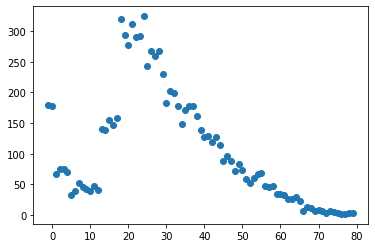

In [38]:
plt.scatter(train['Age'].value_counts().index,train['Age'].value_counts().values)

In [39]:
for dest in train['Destination'].unique():
    for planet in train['HomePlanet'].unique():
        for vip in train['VIP'].unique():
            for cryo in train['CryoSleep'].unique():
                for age in train[(train['Destination']== dest) & (train['HomePlanet']== planet) &
                                    (train['VIP']== vip) & (train['CryoSleep']== cryo)]['Age']:
                    if age == -1:                    
                        mean_age = train[(train['Destination']== dest) & (train['HomePlanet']== planet) &
                                    (train['VIP']== vip) & (train['CryoSleep']== cryo) & (train['Age'] != -1)]['Age'].mean()
                        train.loc[(train['Destination']== dest) & (train['HomePlanet']== planet) &
                                    (train['VIP']== vip) & (train['CryoSleep']== cryo) & (train['Age'] == -1),'Age'] = round(mean_age)

In [40]:
for dest in test['Destination'].unique():
    for planet in test['HomePlanet'].unique():
        for vip in test['VIP'].unique():
            for cryo in test['CryoSleep'].unique():
                for age in test[(test['Destination']== dest) & (test['HomePlanet']== planet) &
                                    (test['VIP']== vip) & (test['CryoSleep']== cryo)]['Age']:
                    if age == -1:                    
                        mean_age = test[(test['Destination']== dest) & (test['HomePlanet']== planet) &
                                    (test['VIP']== vip) & (test['CryoSleep']== cryo) & (test['Age'] != -1)]['Age'].mean()
                        test.loc[(test['Destination']== dest) & (test['HomePlanet']== planet) &
                                    (test['VIP']== vip) & (test['CryoSleep']== cryo) & (test['Age'] == -1),'Age'] = round(mean_age)

### Numerical Features

In [41]:
train = train.drop(['PassengerId','Surname','PeopleNumber','Cabin'],axis=1)

In [42]:
test = test.drop(['Surname','PeopleNumber','Cabin'],axis=1)

In [43]:
test_id = test['PassengerId']
test = test.drop('PassengerId',axis=1)

In [44]:
train[(train['RoomService'].isna()) | (train['FoodCourt'].isna()) |(train['ShoppingMall'].isna()) |(train['Spa'].isna()) |(train['VRDeck'].isna())]

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupNumber,Cabin_0,Cabin_1,Cabin_2
7,Earth,True,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Jacostaffey,True,0006,G,0,S
10,Europa,True,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Flatic,True,0008,B,1,P
16,Mars,False,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Eccle,False,0014,F,3,P
23,Earth,True,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mcfaddennon,False,0020,E,0,S
25,Earth,True,PSO J318.5-22,1.0,False,NaN,0.0,0.0,0.0,0.0,Brantuarez,False,0020,E,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8642,Earth,True,TRAPPIST-1e,21.0,False,0.0,0.0,0.0,0.0,NaN,Beachez,False,9221,G,1497,P
8643,Mars,True,TRAPPIST-1e,50.0,False,0.0,0.0,0.0,NaN,0.0,Chate,True,9222,F,1784,S
8665,Earth,True,TRAPPIST-1e,33.0,False,0.0,0.0,0.0,0.0,NaN,Cleang,False,9247,G,1491,S
8667,Europa,False,TRAPPIST-1e,29.0,False,0.0,2972.0,NaN,28.0,188.0,Reedectied,True,9250,E,597,P


#### RoomService

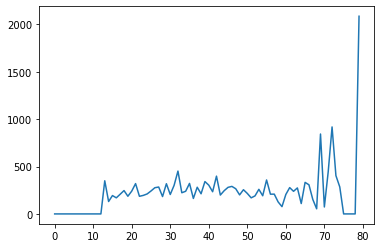

In [45]:
plt.plot(train[['Age','RoomService']].groupby('Age').mean().reset_index()['Age'], train[['Age','RoomService']].groupby('Age').mean().reset_index()['RoomService'])

In [46]:
train[train['Age'] <=12]['RoomService'].mean()

0.0

In [47]:
train.loc[(train['Age'] <=12) & (train['RoomService'].isna()),'RoomService'] = 0

In [48]:
test.loc[(test['Age'] <=12) & (test['RoomService'].isna()),'RoomService'] = 0

In [49]:
train.loc[(train['Age'] >12) & (train['RoomService'].isna()),'RoomService'] = round(train[train['Age'] >= 13]['RoomService'].mean())

In [50]:
test.loc[(test['Age'] >12) & (test['RoomService'].isna()),'RoomService'] = round(test[test['Age'] >= 13]['RoomService'].mean())

#### FoodCourt

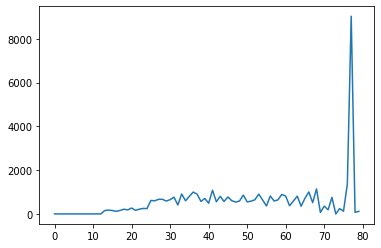

In [51]:
plt.plot(train[['Age','FoodCourt']].groupby('Age').mean().reset_index()['Age'], train[['Age','FoodCourt']].groupby('Age').mean().reset_index()['FoodCourt'])

In [52]:
train[train['Age'] <13]['FoodCourt'].mean()

0.0

In [53]:
train.loc[(train['Age'] <=12) & (train['FoodCourt'].isna()),'FoodCourt'] = 0

In [54]:
test.loc[(test['Age'] <=12) & (test['FoodCourt'].isna()),'FoodCourt'] = 0

In [55]:
train.loc[(train['Age'] >12) & (train['FoodCourt'].isna()),'FoodCourt'] = round(train[(train['Age'] >=13)]['FoodCourt'].mean())

In [56]:
test.loc[(test['Age'] >12) & (test['FoodCourt'].isna()),'FoodCourt'] = round(test[(test['Age'] >=13)]['FoodCourt'].mean())

#### ShoppingMall

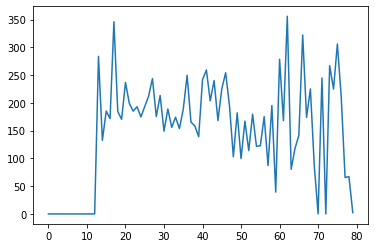

In [57]:
plt.plot(train[['Age','ShoppingMall']].groupby('Age').mean().reset_index()['Age'], train[['Age','ShoppingMall']].groupby('Age').mean().reset_index()['ShoppingMall'])

In [58]:
train[train['Age'] <13]['ShoppingMall'].mean()

0.0

In [59]:
train.loc[(train['Age'] <=12) & (train['ShoppingMall'].isna()),'ShoppingMall'] = 0

In [60]:
test.loc[(test['Age'] <=12) & (test['ShoppingMall'].isna()),'ShoppingMall'] = 0

In [61]:
train.loc[(train['Age'] >12) & (train['ShoppingMall'].isna()),'ShoppingMall'] = round(train[(train['Age'] >=13)]['ShoppingMall'].mean())

In [62]:
test.loc[(test['Age'] >12) & (test['ShoppingMall'].isna()),'ShoppingMall'] = round(test[(test['Age'] >=13)]['ShoppingMall'].mean())

#### Spa

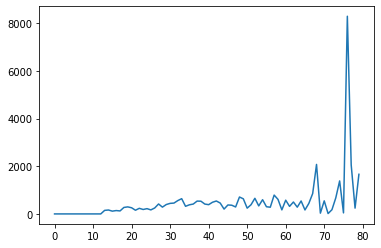

In [63]:
plt.plot(train[['Age','Spa']].groupby('Age').mean().reset_index()['Age'], train[['Age','Spa']].groupby('Age').mean().reset_index()['Spa'])

In [64]:
train[train['Age'] <13]['Spa'].mean()

0.0

In [65]:
train.loc[(train['Age'] <=12) & (train['Spa'].isna()),'Spa'] = 0

In [66]:
test.loc[(test['Age'] <=12) & (test['Spa'].isna()),'Spa'] = 0

In [67]:
train.loc[(train['Age'] >12) & (train['Spa'].isna()),'Spa'] = round(train[(train['Age'] >=13)]['Spa'].mean())

In [68]:
test.loc[(test['Age'] >12) & (test['Spa'].isna()),'Spa'] = round(test[(test['Age'] >=13)]['Spa'].mean())

#### VRDeck

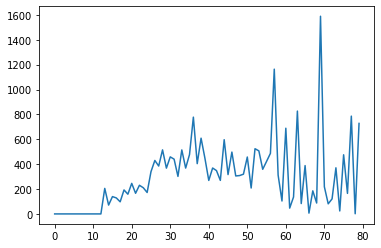

In [69]:
plt.plot(train[['Age','VRDeck']].groupby('Age').mean().reset_index()['Age'], train[['Age','VRDeck']].groupby('Age').mean().reset_index()['VRDeck'])

In [70]:
train[train['Age'] <13]['VRDeck'].mean()

0.0

In [71]:
train.loc[(train['Age'] <=12) & (train['VRDeck'].isna()),'VRDeck'] = 0

In [72]:
test.loc[(test['Age'] <=12) & (test['VRDeck'].isna()),'VRDeck'] = 0

In [73]:
train.loc[(train['Age'] >12) & (train['VRDeck'].isna()),'VRDeck'] = round(train[(train['Age'] >=13)]['VRDeck'].mean())

In [74]:
test.loc[(test['Age'] >12) & (test['VRDeck'].isna()),'VRDeck'] = round(test[(test['Age'] >=13)]['VRDeck'].mean())

In [75]:
train[(train['RoomService'].isna()) | (train['FoodCourt'].isna()) |(train['ShoppingMall'].isna()) |(train['Spa'].isna()) |(train['VRDeck'].isna())]

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupNumber,Cabin_0,Cabin_1,Cabin_2


### Feature Addition

In [76]:
train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupNumber,Cabin_0,Cabin_1,Cabin_2
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Ofracculy,False,0001,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Vines,True,0002,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Susent,False,0003,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Susent,False,0003,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Santantines,True,0004,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Noxnuther,False,9276,A,98,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Mondalley,False,9278,G,1499,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Connon,True,9279,G,1500,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Hontichre,False,9280,E,608,S


In [77]:
train['CryoSleep'] = train['CryoSleep'].astype(int)
train['VIP'] = train['VIP'].astype(int)
group_mean = train.groupby('GroupNumber').mean().reset_index()

roomservice_groupnum_mean = group_mean[['GroupNumber','RoomService']]
roomservice_groupnum_mean['G_RoomService'] = roomservice_groupnum_mean['RoomService']
roomservice_groupnum_mean = roomservice_groupnum_mean.drop('RoomService',axis=1)

foodcourt_groupnum_mean = group_mean[['GroupNumber','FoodCourt']]
foodcourt_groupnum_mean['G_FoodCourt'] = foodcourt_groupnum_mean['FoodCourt']
foodcourt_groupnum_mean = foodcourt_groupnum_mean.drop('FoodCourt',axis=1)

shoppingmall_groupnum_mean = group_mean[['GroupNumber','ShoppingMall']]
shoppingmall_groupnum_mean['G_ShoppingMall'] = shoppingmall_groupnum_mean['ShoppingMall']
shoppingmall_groupnum_mean = shoppingmall_groupnum_mean.drop('ShoppingMall',axis=1)

spa_groupnum_mean = group_mean[['GroupNumber','Spa']]
spa_groupnum_mean['G_Spa'] = spa_groupnum_mean['Spa']
spa_groupnum_mean = spa_groupnum_mean.drop('Spa',axis=1)

vrdeck_groupnum_mean = group_mean[['GroupNumber','VRDeck']]
vrdeck_groupnum_mean['G_VRDeck'] = vrdeck_groupnum_mean['VRDeck']
vrdeck_groupnum_mean = vrdeck_groupnum_mean.drop('VRDeck',axis=1)

cryo_groupnum_comp_transported = (group_mean['CryoSleep'] <= group_mean['Transported'])
df = {'GroupNumber': group_mean['GroupNumber'],
      'G_CryoSleep_Transported': cryo_groupnum_comp_transported}
cryo_groupnum_comp_transported = pd.DataFrame(df)

vip_groupnum_comp_transported = (group_mean['VIP'] <= group_mean['Transported'])
df = {'GroupNumber': group_mean['GroupNumber'],
      'G_VIP_Transported': vip_groupnum_comp_transported}
vip_groupnum_comp_transported = pd.DataFrame(df)

total_groupnum_mean = group_mean.drop(['GroupNumber','Age','VIP','CryoSleep','Transported'],axis=1).mean(axis=1)
df = {'GroupNumber': group_mean['GroupNumber'],
      'G_Total': total_groupnum_mean}
total_groupnum_mean = pd.DataFrame(df)

train = train.merge(roomservice_groupnum_mean)
train = train.merge(foodcourt_groupnum_mean)
train = train.merge(shoppingmall_groupnum_mean)
train = train.merge(spa_groupnum_mean)
train = train.merge(vrdeck_groupnum_mean)
train = train.merge(cryo_groupnum_comp_transported)
train = train.merge(vip_groupnum_comp_transported)
train = train.merge(total_groupnum_mean)

C:\Users\User\AppData\Local\Temp\ipykernel_27520\1651317037.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roomservice_groupnum_mean['G_RoomService'] = roomservice_groupnum_mean['RoomService']
C:\Users\User\AppData\Local\Temp\ipykernel_27520\1651317037.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foodcourt_groupnum_mean['G_FoodCourt'] = foodcourt_groupnum_mean['FoodCourt']
C:\Users\User\AppData\Local\Temp\ipykernel_27520\1651317037.py:14: SettingWithCopyWarning: 
A value is trying to be set on 

In [78]:
home_dest_mean = train.groupby(['HomePlanet','Destination']).mean().reset_index()

roomservice_homedest_mean = home_dest_mean[['HomePlanet','Destination','RoomService']]
roomservice_homedest_mean['HD_RoomService'] = roomservice_homedest_mean['RoomService']
roomservice_homedest_mean = roomservice_homedest_mean.drop('RoomService',axis=1)

FoodCourt_homedest_mean = home_dest_mean[['HomePlanet','Destination','FoodCourt']]
FoodCourt_homedest_mean['HD_FoodCourt'] = FoodCourt_homedest_mean['FoodCourt']
FoodCourt_homedest_mean = FoodCourt_homedest_mean.drop('FoodCourt',axis=1)

ShoppingMall_homedest_mean = home_dest_mean[['HomePlanet','Destination','ShoppingMall']]
ShoppingMall_homedest_mean['HD_ShoppingMall'] = ShoppingMall_homedest_mean['ShoppingMall']
ShoppingMall_homedest_mean = ShoppingMall_homedest_mean.drop('ShoppingMall',axis=1)

Spa_homedest_mean = home_dest_mean[['HomePlanet','Destination','Spa']]
Spa_homedest_mean['HD_Spa'] = Spa_homedest_mean['Spa']
Spa_homedest_mean = Spa_homedest_mean.drop('Spa',axis=1)

VRDeck_homedest_mean = home_dest_mean[['HomePlanet','Destination','VRDeck']]
VRDeck_homedest_mean['HD_VRDeck'] = VRDeck_homedest_mean['VRDeck']
VRDeck_homedest_mean = VRDeck_homedest_mean.drop('VRDeck',axis=1)

CryoSleep_homedest_mean = home_dest_mean[['HomePlanet','Destination','CryoSleep']]
CryoSleep_homedest_mean['HD_CryoSleep'] = CryoSleep_homedest_mean['CryoSleep']
CryoSleep_homedest_mean = CryoSleep_homedest_mean.drop('CryoSleep',axis=1)

VIP_homedest_mean = home_dest_mean[['HomePlanet','Destination','VIP']]
VIP_homedest_mean['HD_VIP'] = VIP_homedest_mean['VIP']
VIP_homedest_mean = VIP_homedest_mean.drop('VIP',axis=1)

train = train.merge(roomservice_homedest_mean)
train = train.merge(FoodCourt_homedest_mean)
train = train.merge(ShoppingMall_homedest_mean)
train = train.merge(Spa_homedest_mean)
train = train.merge(VRDeck_homedest_mean)
train = train.merge(CryoSleep_homedest_mean)
train = train.merge(VIP_homedest_mean)



C:\Users\User\AppData\Local\Temp\ipykernel_27520\2548659455.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roomservice_homedest_mean['HD_RoomService'] = roomservice_homedest_mean['RoomService']
C:\Users\User\AppData\Local\Temp\ipykernel_27520\2548659455.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FoodCourt_homedest_mean['HD_FoodCourt'] = FoodCourt_homedest_mean['FoodCourt']
C:\Users\User\AppData\Local\Temp\ipykernel_27520\2548659455.py:12: SettingWithCopyWarning: 
A value is trying to be set on

In [79]:
cabin_mean = train.groupby(['Cabin_0','Cabin_2']).mean().reset_index()

roomservice_cabin_mean = cabin_mean[['Cabin_0','Cabin_2','RoomService']]
roomservice_cabin_mean['C_RoomService'] = roomservice_cabin_mean['RoomService']
roomservice_cabin_mean = roomservice_cabin_mean.drop('RoomService',axis=1)

FoodCourt_cabin_mean = cabin_mean[['Cabin_0','Cabin_2','FoodCourt']]
FoodCourt_cabin_mean['C_FoodCourt'] = FoodCourt_cabin_mean['FoodCourt']
FoodCourt_cabin_mean = FoodCourt_cabin_mean.drop('FoodCourt',axis=1)

ShoppingMall_cabin_mean = cabin_mean[['Cabin_0','Cabin_2','ShoppingMall']]
ShoppingMall_cabin_mean['C_ShoppingMall'] = ShoppingMall_cabin_mean['ShoppingMall']
ShoppingMall_cabin_mean = ShoppingMall_cabin_mean.drop('ShoppingMall',axis=1)

Spa_cabin_mean = cabin_mean[['Cabin_0','Cabin_2','Spa']]
Spa_cabin_mean['C_Spa'] = Spa_cabin_mean['Spa']
Spa_cabin_mean = Spa_cabin_mean.drop('Spa',axis=1)

VRDeck_cabin_mean = cabin_mean[['Cabin_0','Cabin_2','VRDeck']]
VRDeck_cabin_mean['C_VRDeck'] = VRDeck_cabin_mean['VRDeck']
VRDeck_cabin_mean = VRDeck_cabin_mean.drop('VRDeck',axis=1)

CryoSleep_cabin_mean = cabin_mean[['Cabin_0','Cabin_2','CryoSleep']]
CryoSleep_cabin_mean['C_CryoSleep'] = CryoSleep_cabin_mean['CryoSleep']
CryoSleep_cabin_mean = CryoSleep_cabin_mean.drop('CryoSleep',axis=1)

VIP_cabin_mean = cabin_mean[['Cabin_0','Cabin_2','VIP']]
VIP_cabin_mean['C_VIP'] = VIP_cabin_mean['VIP']
VIP_cabin_mean = VIP_cabin_mean.drop('VIP',axis=1)

train = train.merge(roomservice_cabin_mean)
train = train.merge(FoodCourt_cabin_mean)
train = train.merge(ShoppingMall_cabin_mean)
train = train.merge(Spa_cabin_mean)
train = train.merge(VRDeck_cabin_mean)
train = train.merge(CryoSleep_cabin_mean)
train = train.merge(VIP_cabin_mean)

C:\Users\User\AppData\Local\Temp\ipykernel_27520\3896027072.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roomservice_cabin_mean['C_RoomService'] = roomservice_cabin_mean['RoomService']
C:\Users\User\AppData\Local\Temp\ipykernel_27520\3896027072.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FoodCourt_cabin_mean['C_FoodCourt'] = FoodCourt_cabin_mean['FoodCourt']
C:\Users\User\AppData\Local\Temp\ipykernel_27520\3896027072.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [80]:
test['CryoSleep'] = test['CryoSleep'].astype(int)
test['VIP'] = test['VIP'].astype(int)
group_mean = test.groupby('GroupNumber').mean().reset_index()

roomservice_groupnum_mean = group_mean[['GroupNumber','RoomService']]
roomservice_groupnum_mean['G_RoomService'] = roomservice_groupnum_mean['RoomService']
roomservice_groupnum_mean = roomservice_groupnum_mean.drop('RoomService',axis=1)

foodcourt_groupnum_mean = group_mean[['GroupNumber','FoodCourt']]
foodcourt_groupnum_mean['G_FoodCourt'] = foodcourt_groupnum_mean['FoodCourt']
foodcourt_groupnum_mean = foodcourt_groupnum_mean.drop('FoodCourt',axis=1)

shoppingmall_groupnum_mean = group_mean[['GroupNumber','ShoppingMall']]
shoppingmall_groupnum_mean['G_ShoppingMall'] = shoppingmall_groupnum_mean['ShoppingMall']
shoppingmall_groupnum_mean = shoppingmall_groupnum_mean.drop('ShoppingMall',axis=1)

spa_groupnum_mean = group_mean[['GroupNumber','Spa']]
spa_groupnum_mean['G_Spa'] = spa_groupnum_mean['Spa']
spa_groupnum_mean = spa_groupnum_mean.drop('Spa',axis=1)

vrdeck_groupnum_mean = group_mean[['GroupNumber','VRDeck']]
vrdeck_groupnum_mean['G_VRDeck'] = vrdeck_groupnum_mean['VRDeck']
vrdeck_groupnum_mean = vrdeck_groupnum_mean.drop('VRDeck',axis=1)

total_groupnum_mean = group_mean.drop(['GroupNumber','Age','VIP','CryoSleep'],axis=1).mean(axis=1)
df = {'GroupNumber': group_mean['GroupNumber'],
      'G_Total': total_groupnum_mean}
total_groupnum_mean = pd.DataFrame(df)

test = test.merge(roomservice_groupnum_mean)
test = test.merge(foodcourt_groupnum_mean)
test = test.merge(shoppingmall_groupnum_mean)
test = test.merge(spa_groupnum_mean)
test = test.merge(vrdeck_groupnum_mean)
test = test.merge(total_groupnum_mean)

C:\Users\User\AppData\Local\Temp\ipykernel_27520\837221856.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roomservice_groupnum_mean['G_RoomService'] = roomservice_groupnum_mean['RoomService']


C:\Users\User\AppData\Local\Temp\ipykernel_27520\837221856.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foodcourt_groupnum_mean['G_FoodCourt'] = foodcourt_groupnum_mean['FoodCourt']
C:\Users\User\AppData\Local\Temp\ipykernel_27520\837221856.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shoppingmall_groupnum_mean['G_ShoppingMall'] = shoppingmall_groupnum_mean['ShoppingMall']
C:\Users\User\AppData\Local\Temp\ipykernel_27520\837221856.py:18: SettingWithCopyWarning: 
A value is trying to be set o

In [81]:
home_dest_mean = test.groupby(['HomePlanet','Destination']).mean().reset_index()

roomservice_homedest_mean = home_dest_mean[['HomePlanet','Destination','RoomService']]
roomservice_homedest_mean['HD_RoomService'] = roomservice_homedest_mean['RoomService']
roomservice_homedest_mean = roomservice_homedest_mean.drop('RoomService',axis=1)

FoodCourt_homedest_mean = home_dest_mean[['HomePlanet','Destination','FoodCourt']]
FoodCourt_homedest_mean['HD_FoodCourt'] = FoodCourt_homedest_mean['FoodCourt']
FoodCourt_homedest_mean = FoodCourt_homedest_mean.drop('FoodCourt',axis=1)

ShoppingMall_homedest_mean = home_dest_mean[['HomePlanet','Destination','ShoppingMall']]
ShoppingMall_homedest_mean['HD_ShoppingMall'] = ShoppingMall_homedest_mean['ShoppingMall']
ShoppingMall_homedest_mean = ShoppingMall_homedest_mean.drop('ShoppingMall',axis=1)

Spa_homedest_mean = home_dest_mean[['HomePlanet','Destination','Spa']]
Spa_homedest_mean['HD_Spa'] = Spa_homedest_mean['Spa']
Spa_homedest_mean = Spa_homedest_mean.drop('Spa',axis=1)

VRDeck_homedest_mean = home_dest_mean[['HomePlanet','Destination','VRDeck']]
VRDeck_homedest_mean['HD_VRDeck'] = VRDeck_homedest_mean['VRDeck']
VRDeck_homedest_mean = VRDeck_homedest_mean.drop('VRDeck',axis=1)

CryoSleep_homedest_mean = home_dest_mean[['HomePlanet','Destination','CryoSleep']]
CryoSleep_homedest_mean['HD_CryoSleep'] = CryoSleep_homedest_mean['CryoSleep']
CryoSleep_homedest_mean = CryoSleep_homedest_mean.drop('CryoSleep',axis=1)

VIP_homedest_mean = home_dest_mean[['HomePlanet','Destination','VIP']]
VIP_homedest_mean['HD_VIP'] = VIP_homedest_mean['VIP']
VIP_homedest_mean = VIP_homedest_mean.drop('VIP',axis=1)

test = test.merge(roomservice_homedest_mean)
test = test.merge(FoodCourt_homedest_mean)
test = test.merge(ShoppingMall_homedest_mean)
test = test.merge(Spa_homedest_mean)
test = test.merge(VRDeck_homedest_mean)
test = test.merge(CryoSleep_homedest_mean)
test = test.merge(VIP_homedest_mean)

C:\Users\User\AppData\Local\Temp\ipykernel_27520\1763725671.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roomservice_homedest_mean['HD_RoomService'] = roomservice_homedest_mean['RoomService']
C:\Users\User\AppData\Local\Temp\ipykernel_27520\1763725671.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FoodCourt_homedest_mean['HD_FoodCourt'] = FoodCourt_homedest_mean['FoodCourt']
C:\Users\User\AppData\Local\Temp\ipykernel_27520\1763725671.py:12: SettingWithCopyWarning: 
A value is trying to be set on

In [82]:
cabin_mean = test.groupby(['Cabin_0','Cabin_2']).mean().reset_index()

roomservice_cabin_mean = cabin_mean[['Cabin_0','Cabin_2','RoomService']]
roomservice_cabin_mean['C_RoomService'] = roomservice_cabin_mean['RoomService']
roomservice_cabin_mean = roomservice_cabin_mean.drop('RoomService',axis=1)

FoodCourt_cabin_mean = cabin_mean[['Cabin_0','Cabin_2','FoodCourt']]
FoodCourt_cabin_mean['C_FoodCourt'] = FoodCourt_cabin_mean['FoodCourt']
FoodCourt_cabin_mean = FoodCourt_cabin_mean.drop('FoodCourt',axis=1)

ShoppingMall_cabin_mean = cabin_mean[['Cabin_0','Cabin_2','ShoppingMall']]
ShoppingMall_cabin_mean['C_ShoppingMall'] = ShoppingMall_cabin_mean['ShoppingMall']
ShoppingMall_cabin_mean = ShoppingMall_cabin_mean.drop('ShoppingMall',axis=1)

Spa_cabin_mean = cabin_mean[['Cabin_0','Cabin_2','Spa']]
Spa_cabin_mean['C_Spa'] = Spa_cabin_mean['Spa']
Spa_cabin_mean = Spa_cabin_mean.drop('Spa',axis=1)

VRDeck_cabin_mean = cabin_mean[['Cabin_0','Cabin_2','VRDeck']]
VRDeck_cabin_mean['C_VRDeck'] = VRDeck_cabin_mean['VRDeck']
VRDeck_cabin_mean = VRDeck_cabin_mean.drop('VRDeck',axis=1)

CryoSleep_cabin_mean = cabin_mean[['Cabin_0','Cabin_2','CryoSleep']]
CryoSleep_cabin_mean['C_CryoSleep'] = CryoSleep_cabin_mean['CryoSleep']
CryoSleep_cabin_mean = CryoSleep_cabin_mean.drop('CryoSleep',axis=1)

VIP_cabin_mean = cabin_mean[['Cabin_0','Cabin_2','VIP']]
VIP_cabin_mean['C_VIP'] = VIP_cabin_mean['VIP']
VIP_cabin_mean = VIP_cabin_mean.drop('VIP',axis=1)

test = test.merge(roomservice_cabin_mean)
test = test.merge(FoodCourt_cabin_mean)
test = test.merge(ShoppingMall_cabin_mean)
test = test.merge(Spa_cabin_mean)
test = test.merge(VRDeck_cabin_mean)
test = test.merge(CryoSleep_cabin_mean)
test = test.merge(VIP_cabin_mean)

C:\Users\User\AppData\Local\Temp\ipykernel_27520\3826708943.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  roomservice_cabin_mean['C_RoomService'] = roomservice_cabin_mean['RoomService']
C:\Users\User\AppData\Local\Temp\ipykernel_27520\3826708943.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FoodCourt_cabin_mean['C_FoodCourt'] = FoodCourt_cabin_mean['FoodCourt']
C:\Users\User\AppData\Local\Temp\ipykernel_27520\3826708943.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [83]:
train = train.drop(['Cabin_1','Name','GroupNumber'],axis=1)

In [84]:
test = test.drop(['Cabin_1','Name','GroupNumber'],axis=1)

In [85]:
train.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Cabin_0',
       'Cabin_2', 'G_RoomService', 'G_FoodCourt', 'G_ShoppingMall', 'G_Spa',
       'G_VRDeck', 'G_CryoSleep_Transported', 'G_VIP_Transported', 'G_Total',
       'HD_RoomService', 'HD_FoodCourt', 'HD_ShoppingMall', 'HD_Spa',
       'HD_VRDeck', 'HD_CryoSleep', 'HD_VIP', 'C_RoomService', 'C_FoodCourt',
       'C_ShoppingMall', 'C_Spa', 'C_VRDeck', 'C_CryoSleep', 'C_VIP'],
      dtype='object')

In [86]:
train['Age_Class'] = train['Age']
train.loc[train['Age_Class'] <=12,'Age_Class'] = 0
train.loc[(train['Age_Class'] >=13) & (train['Age_Class'] <=23),'Age_Class'] = 1
train.loc[(train['Age_Class'] >=24) & (train['Age_Class'] <=60),'Age_Class'] = 2
train.loc[(train['Age_Class'] >=61),'Age_Class'] = 3
train[['Age_Class','Transported']].groupby('Age_Class').mean()

,Transported
Age_Class,
0.0,0.699752
1.0,0.488645
2.0,0.481518
3.0,0.472727


In [87]:
test['Age_Class'] = test['Age']
test.loc[test['Age_Class'] <=12,'Age_Class'] = 0
test.loc[(test['Age_Class'] >=13) & (test['Age_Class'] <=23),'Age_Class'] = 1
test.loc[(test['Age_Class'] >=24) & (test['Age_Class'] <=60),'Age_Class'] = 2
test.loc[(test['Age_Class'] >=61),'Age_Class'] = 3

In [88]:
train[['HomePlanet','Transported']].groupby('HomePlanet').mean()

,Transported
HomePlanet,
Earth,0.425886
Europa,0.659325
Mars,0.517866


In [89]:
train.loc[train['HomePlanet'] == 'Earth','HomePlanet'] = 0
train.loc[train['HomePlanet'] == 'Mars','HomePlanet'] = 1
train.loc[train['HomePlanet'] == 'Europa','HomePlanet'] = 2
train['HomePlanet'] = train['HomePlanet'].astype(int)

In [90]:
test.loc[test['HomePlanet'] == 'Earth','HomePlanet'] = 0
test.loc[test['HomePlanet'] == 'Mars','HomePlanet'] = 1
test.loc[test['HomePlanet'] == 'Europa','HomePlanet'] = 2
test['HomePlanet'] = test['HomePlanet'].astype(int)

In [91]:
train[['Destination','Transported']].groupby('Destination').mean()

,Transported
Destination,
55 Cancri e,0.614883
PSO J318.5-22,0.495536
TRAPPIST-1e,0.470450


In [92]:
train.loc[train['Destination'] == 'TRAPPIST-1e','Destination'] = 0
train.loc[train['Destination'] == 'PSO J318.5-22','Destination'] = 1
train.loc[train['Destination'] == '55 Cancri e','Destination'] = 2
train['Destination'] = train['Destination'].astype(int)

In [93]:
test.loc[test['Destination'] == 'TRAPPIST-1e','Destination'] = 0
test.loc[test['Destination'] == 'PSO J318.5-22','Destination'] = 1
test.loc[test['Destination'] == '55 Cancri e','Destination'] = 2
test['Destination'] = test['Destination'].astype(int)

In [94]:
train[['Cabin_0','Transported']].groupby('Cabin_0').mean()

,Transported
Cabin_0,
A,0.496296
B,0.732342
C,0.681102
D,0.437882
E,0.357143
F,0.440267
G,0.514144
T,0.200000


In [95]:
train.loc[train['Cabin_0'] == 'T','Cabin_0'] = 0
train.loc[train['Cabin_0'] == 'E','Cabin_0'] = 1
train.loc[train['Cabin_0'] == 'D','Cabin_0'] = 2
train.loc[train['Cabin_0'] == 'F','Cabin_0'] = 3
train.loc[train['Cabin_0'] == 'A','Cabin_0'] = 4
train.loc[train['Cabin_0'] == 'G','Cabin_0'] = 5
train.loc[train['Cabin_0'] == 'C','Cabin_0'] = 6
train.loc[train['Cabin_0'] == 'B','Cabin_0'] = 7
train['Cabin_0'] = train['Cabin_0'].astype(int)

In [96]:
test.loc[test['Cabin_0'] == 'T','Cabin_0'] = 0
test.loc[test['Cabin_0'] == 'E','Cabin_0'] = 1
test.loc[test['Cabin_0'] == 'D','Cabin_0'] = 2
test.loc[test['Cabin_0'] == 'F','Cabin_0'] = 3
test.loc[test['Cabin_0'] == 'A','Cabin_0'] = 4
test.loc[test['Cabin_0'] == 'G','Cabin_0'] = 5
test.loc[test['Cabin_0'] == 'C','Cabin_0'] = 6
test.loc[test['Cabin_0'] == 'B','Cabin_0'] = 7
test['Cabin_0'] = test['Cabin_0'].astype(int)

In [97]:
train[['Cabin_2','Transported']].groupby('Cabin_2').mean()

,Transported
Cabin_2,
P,0.449674
S,0.556237


In [98]:
train.loc[train['Cabin_2'] == 'P','Cabin_2'] = 0
train.loc[train['Cabin_2'] == 'S','Cabin_2'] = 1
train['Cabin_2'] = train['Cabin_2'].astype(int)

In [99]:
test.loc[test['Cabin_2'] == 'P','Cabin_2'] = 0
test.loc[test['Cabin_2'] == 'S','Cabin_2'] = 1
test['Cabin_2'] = test['Cabin_2'].astype(int)

In [100]:
train[['G_CryoSleep_Transported','Transported']].groupby('G_CryoSleep_Transported').mean()

,Transported
G_CryoSleep_Transported,
False,0.141129
True,0.537552


In [101]:
train['G_CryoSleep_Transported'] = train['G_CryoSleep_Transported'].astype(int)

In [102]:
train[['G_VIP_Transported','Transported']].groupby('G_VIP_Transported').mean()

,Transported
G_VIP_Transported,
False,0.019417
True,0.509430


In [103]:
train['G_VIP_Transported'] = train['G_VIP_Transported'].astype(int)

In [104]:
train['Transported'] = train['Transported'].astype(int)

### Feature Selection

#### Manuel Selection

In [105]:
train = train.drop(['G_CryoSleep_Transported','G_VIP_Transported'],axis=1)

In [106]:
# VIP
import statsmodels.api as sm
from statsmodels.formula.api import ols


df = pd.DataFrame({'y':train['Transported'], 'x':train['Cabin_2']})
mod = ols('y~x', data=df).fit()

aov_table = sm.stats.anova_lm(mod, typ=2)

print(aov_table)

               sum_sq      df          F        PR(>F)
x           24.675025     1.0  99.815941  2.235256e-23
Residual  2148.460832  8691.0        NaN           NaN


In [107]:
# ShoppinngMall and G, RoomService,FoodCourt,G_Spa,G_vrdeck
from scipy.stats import pearsonr

x = np.array(train['HD_VRDeck'])
y = np.array(train['Transported'])

nas = np.logical_or(np.isnan(x), np.isnan(y))
coef, p = pearsonr(x[~nas], y[~nas])

print(coef, p)

0.16893986426851076 1.139366360252992e-56


In [108]:
modified_train = train.drop(['HD_RoomService','HD_ShoppingMall','HD_FoodCourt','HD_VIP','Age','HD_Spa','HD_VRDeck','C_VIP'],axis=1)
modified_train = modified_train.drop(['C_CryoSleep','C_VRDeck','C_Spa','C_FoodCourt','C_RoomService','HD_CryoSleep','C_ShoppingMall'],axis=1)

In [109]:
modified_test = test.drop(['HD_RoomService','HD_ShoppingMall','HD_FoodCourt','HD_VIP','Age','HD_Spa','HD_VRDeck','C_VIP'],axis=1)
modified_test = modified_test.drop(['C_CryoSleep','C_VRDeck','C_Spa','C_FoodCourt','C_RoomService','HD_CryoSleep','C_ShoppingMall'],axis=1)

#### Feature Selection Function

In [110]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif,chi2
# generate dataset
y = train['Transported']
X_cat = train[['HomePlanet', 'CryoSleep', 'Destination','VIP','Cabin_0','Cabin_2','Age_Class']]
X_test_cat = test[['HomePlanet', 'CryoSleep', 'Destination','VIP','Cabin_0','Cabin_2','Age_Class']]
X_num = train[['Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','G_RoomService', 'G_FoodCourt', 'G_ShoppingMall', 'G_Spa',
               'G_VRDeck', 'G_Total', 'HD_RoomService', 'HD_FoodCourt','HD_ShoppingMall', 'HD_Spa', 'HD_VRDeck', 'HD_CryoSleep', 'HD_VIP',
               'C_RoomService', 'C_FoodCourt', 'C_ShoppingMall', 'C_Spa', 'C_VRDeck','C_CryoSleep', 'C_VIP']]
X_test_num = test[['Age','RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','G_RoomService', 'G_FoodCourt', 'G_ShoppingMall', 'G_Spa',
               'G_VRDeck', 'G_Total', 'HD_RoomService', 'HD_FoodCourt','HD_ShoppingMall', 'HD_Spa', 'HD_VRDeck', 'HD_CryoSleep', 'HD_VIP',
               'C_RoomService', 'C_FoodCourt', 'C_ShoppingMall', 'C_Spa', 'C_VRDeck','C_CryoSleep', 'C_VIP']]
# define feature selection
fs_num = SelectKBest(score_func=f_classif, k=4) 
fs_cat = SelectKBest(score_func=chi2, k=5)
# apply feature selection
fs_cat.fit(X_cat, y)
fs_num.fit(X_num, y)
X_cat_selected = fs_cat.transform(X_cat)
X_test_cat_selected = fs_cat.transform(X_test_cat)
X_num_selected = fs_num.transform(X_num)
X_test_num_selected = fs_num.transform(X_test_num)

In [111]:
X_selected = pd.concat([pd.DataFrame(X_cat_selected),pd.DataFrame(X_num_selected)],axis=1,ignore_index=True)
test_selected = pd.concat([pd.DataFrame(X_test_cat_selected),pd.DataFrame(X_test_num_selected)],axis=1,ignore_index=True)

#### PCA

In [112]:
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA

scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(pd.concat([train.drop(['Transported'],axis=1),test],ignore_index=True))) #scaling the data

<Axes: >

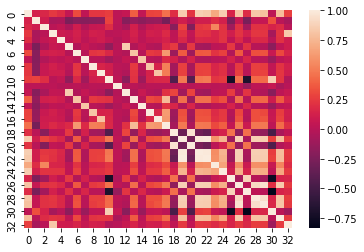

In [113]:
import seaborn as sns
sns.heatmap(scaled_data.corr())

In [114]:
pca = PCA(n_components = 8)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

In [115]:
data_test_pca = data_pca[8693:]
data_pca = data_pca[:8693]

## Modelling

### CatBoost

In [ ]:
y = train['Transported']
X = X_selected

In [ ]:
SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = SEED)

In [ ]:
from tqdm import tqdm
from catboost import CatBoostClassifier
  
catboost = CatBoostClassifier()

In [ ]:
catboost.fit(X_train,y_train)
pred_test = catboost.predict(X_test)

cm = confusion_matrix(y_test,pred_test)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of CB')
print(classification_report(y_test, pred_test))

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'iterations': [10000], 
              'learning_rate': [0.01, 0.02,0.03,0.05],
              'depth': [3,4,5,6]} 
  
grid = GridSearchCV(CatBoostClassifier(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'depth': 6, 'iterations': 10000, 'learning_rate': 0.01}


              precision    recall  f1-score   support

           0       0.80      0.79      0.79       861
           1       0.80      0.80      0.80       878

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



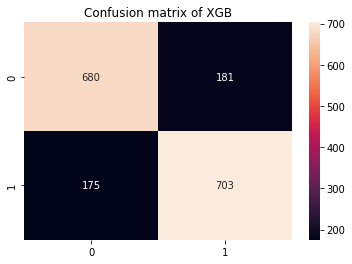

In [ ]:
import seaborn as sns

grid_predictions = grid.predict(X_test)

cm = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of XGB')
# print classification report
print(classification_report(y_test, grid_predictions))

In [ ]:
import plotly.express as px

importance = catboost.get_feature_importance()

f_importance = pd.concat([pd.Series(X.columns.to_list(),name='Feature'),
                          pd.Series(np.mean(importance,axis=0),name="Importance")],
                         axis=1).sort_values(by='Importance',
                                             ascending=True)

fig = px.bar(f_importance.tail(20),x='Importance',y='Feature')
fig.update_layout(
    title_text="First 20 Important Features - CatBoost Average of Folds"
)
fig.show()

In [ ]:
predictions = catboost.predict(test)

### XGB

In [ ]:
y = train['Transported']
X = X_selected

In [ ]:
SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = SEED)

In [ ]:
import xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()

              precision    recall  f1-score   support

           0       0.80      0.73      0.76       874
           1       0.75      0.82      0.78       865

    accuracy                           0.77      1739
   macro avg       0.78      0.77      0.77      1739
weighted avg       0.78      0.77      0.77      1739



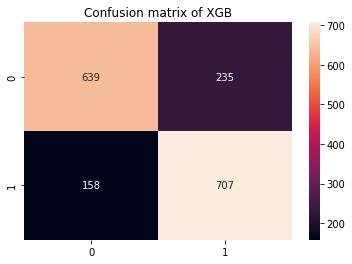

In [ ]:
xgb.fit(X_train,y_train)
pred_test = xgb.predict(X_test)

cm = confusion_matrix(y_test,pred_test)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of XGB')
print(classification_report(y_test, pred_test))

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'booster': ['gbtree','gblinear','dart'], 
              'eta': [0.001,0.01, 0.1,0.3,0.5],
              'gamma': [0,0.5,1,10,100],
              'max_depth': [0,3,6,10],
              'lambda': [0,1,10],
              'alpha': [0,1,10]} 
  
grid = GridSearchCV(XGBClassifier(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'alpha': 0, 'booster': 'gbtree', 'eta': 0.3, 'gamma': 0, 'lambda': 10, 'max_depth': 6}
XGBClassifier(alpha=0, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.3,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', lambda=10,
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', ...)


              precision    recall  f1-score   support

           0       0.80      0.79      0.79       861
           1       0.80      0.81      0.80       878

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



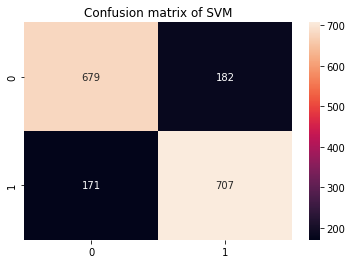

In [ ]:
import seaborn as sns

grid_predictions = grid.predict(X_test)

cm = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of XGB')
# print classification report
print(classification_report(y_test, grid_predictions))

In [ ]:
predictions = grid.predict(test)

### OLS

In [ ]:
y = train['Transported']
X = X_selected
import statsmodels.api as sm

model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                                 OLS Regression Results                                
Dep. Variable:            Transported   R-squared (uncentered):                   0.651
Model:                            OLS   Adj. R-squared (uncentered):              0.651
Method:                 Least Squares   F-statistic:                              1803.
Date:                Wed, 02 Aug 2023   Prob (F-statistic):                        0.00
Time:                        20:24:43   Log-Likelihood:                         -4772.4
No. Observations:                8693   AIC:                                      9563.
Df Residuals:                    8684   BIC:                                      9626.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Kernel SVM

In [ ]:
y = train['Transported']
X = X_selected

In [ ]:
SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = SEED)

              precision    recall  f1-score   support

           0       0.78      0.71      0.74       874
           1       0.73      0.80      0.76       865

    accuracy                           0.75      1739
   macro avg       0.76      0.75      0.75      1739
weighted avg       0.76      0.75      0.75      1739



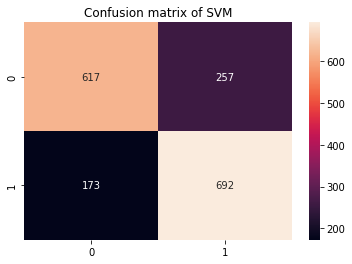

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')

svc.fit(X_train,y_train)
pred_test = svc.predict(X_test)

cm = confusion_matrix(y_test,pred_test)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of SVM')
print(classification_report(y_test, pred_test))

In [ ]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [1,5, 10,30,50], 
              'gamma': ['scale',0.1,0.05, 0.03,0.01],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

[CV 2/5] END ......C=50, gamma=0.05, kernel=rbf;, score=0.712 total time=   3.9s
[CV 3/5] END ......C=50, gamma=0.05, kernel=rbf;, score=0.740 total time=   3.2s
[CV 4/5] END ......C=50, gamma=0.05, kernel=rbf;, score=0.751 total time=   4.0s
[CV 5/5] END ......C=50, gamma=0.05, kernel=rbf;, score=0.730 total time=   3.5s
[CV 1/5] END ......C=50, gamma=0.03, kernel=rbf;, score=0.723 total time=   3.6s
[CV 2/5] END ......C=50, gamma=0.03, kernel=rbf;, score=0.727 total time=   3.5s
[CV 3/5] END ......C=50, gamma=0.03, kernel=rbf;, score=0.740 total time=   3.2s
[CV 4/5] END ......C=50, gamma=0.03, kernel=rbf;, score=0.756 total time=   3.9s
[CV 5/5] END ......C=50, gamma=0.03, kernel=rbf;, score=0.734 total time=   4.1s
[CV 1/5] END ......C=50, gamma=0.01, kernel=rbf;, score=0.728 total time=   4.1s
[CV 2/5] END ......C=50, gamma=0.01, kernel=rbf;, score=0.735 total time=   3.6s
[CV 3/5] END ......C=50, gamma=0.01, kernel=rbf;, score=0.735 total time=   4.2s
[CV 4/5] END ......C=50, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 5, 10, 30, 50],
                         'gamma': ['scale', 0.1, 0.05, 0.03, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
SVC(C=50)


              precision    recall  f1-score   support

           0       0.80      0.70      0.75       874
           1       0.73      0.83      0.78       865

    accuracy                           0.76      1739
   macro avg       0.77      0.76      0.76      1739
weighted avg       0.77      0.76      0.76      1739



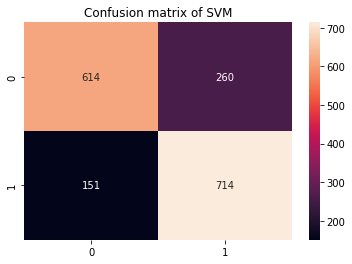

In [ ]:
import seaborn as sns

grid_predictions = grid.predict(X_test)

cm = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of SVM')
# print classification report
print(classification_report(y_test, grid_predictions))

In [ ]:
predictions = grid.predict(data_test_pca)

### Random Forest

In [ ]:
y = train['Transported']
X = X_selected

In [ ]:
SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = SEED)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rf = RandomForestClassifier(random_state=0)

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       874
           1       0.75      0.79      0.77       865

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739



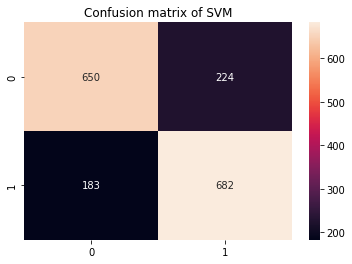

In [ ]:
rf.fit(X_train,y_train)
pred_test = rf.predict(X_test)

cm = confusion_matrix(y_test,pred_test)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of SVM')
print(classification_report(y_test, pred_test))

In [ ]:
# defining parameter range
param_grid = {'criterion': ['gini','entrophy','log_loss'], 
              'max_depth': [3, 5,7,10],
              'bootstrap': [False,True],
              'max_samples': [None,10,100,1000],
              'ccp_alpha': [0.01,0.001,0.005]} 
  
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'bootstrap': True, 'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 10, 'max_samples': None}
RandomForestClassifier(ccp_alpha=0.001, max_depth=10)


              precision    recall  f1-score   support

           0       0.79      0.74      0.76       874
           1       0.75      0.80      0.78       865

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739



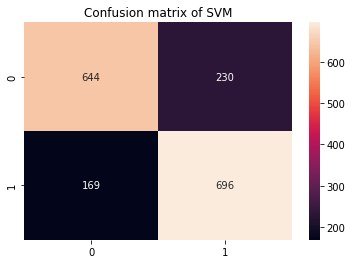

In [ ]:
grid_predictions = grid.predict(X_test)

cm = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of SVM')
# print classification report
print(classification_report(y_test, grid_predictions))

In [ ]:
predictions = rf.predict(modified_test)

## Test Results

In [ ]:
predictions.shape

(4277,)

In [ ]:
test_results = {'PassengerId':test_id, 'Transported':predictions}
test_results = pd.DataFrame(test_results)
test_results['Transported'] = test_results['Transported'].astype(bool)
test_results

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,True
4274,9271_01,False
4275,9273_01,False


In [ ]:
test_results.to_csv('C:/Users/User/Desktop/Kaggle - Spaceship Titanic/sample_submission.csv',index=False)